In [3]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(font_scale=1.5) 
#df = pd.read_csv('./leison_evaluation2.csv',index_col=0)

In [10]:
def acc_plot(df,save_path=None,cols=['val_hcc_dice','val_cyst_dice','val_angioma_dice'],legends=['kidney','cyst','ccrcc']):
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    for col,legend in zip(cols,legends):
        ax.plot(df[col],label=legend)
    ax.set_xlabel('plot')
    ax.set_ylabel('Dice')
    plt.legend()
    plt.tight_layout()
    if save_path!=None:
        plt.savefig(save_path)
    plt.show()

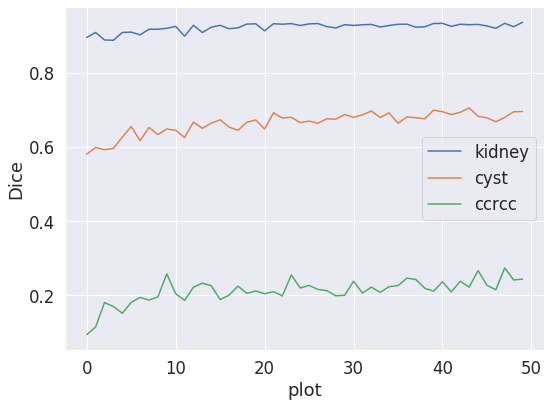

In [13]:
acc_plot(df,save_path=None,cols=['val_hcc_dice','val_cyst_dice','val_angioma_dice'],legends=['kidney','cyst','ccrcc'])

In [11]:
df.head()

,epoch,angioma_dice,bg_dice,cyst_dice,hcc_dice,loss,val_angioma_dice,val_bg_dice,val_cyst_dice,val_hcc_dice,val_loss
0,0,0.091692,0.963746,0.469197,0.859667,0.004494,0.093900,0.971715,0.580215,0.894426,0.004492
1,1,0.172760,0.975864,0.589366,0.889351,0.003314,0.114732,0.973833,0.597956,0.907808,0.004679
2,2,0.208261,0.978982,0.633398,0.899839,0.002886,0.180457,0.974578,0.592162,0.887654,0.004547
3,3,0.231536,0.980886,0.664641,0.906291,0.002630,0.169701,0.979830,0.595619,0.886882,0.004229
4,4,0.253659,0.982062,0.683099,0.910999,0.002454,0.151572,0.977141,0.625994,0.907937,0.004704


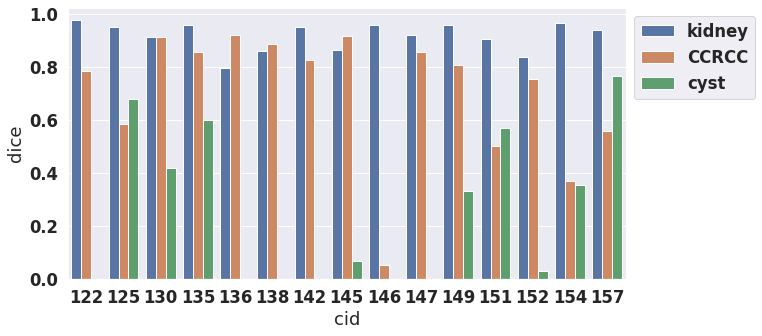

In [284]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5) 

# df[df['label_name']=='cyst'].sort_values('dice')
sns.barplot(x='cid',y='dice',data=df,hue='label_name')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig(f'/home/kakeya/Desktop/higuchi/20191011/output/EDA_result/whole_dice.png')
plt.show()


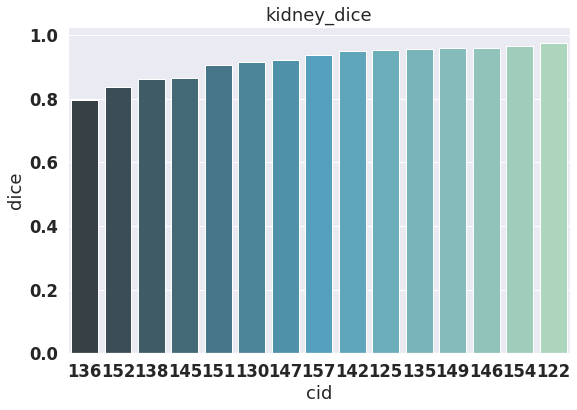

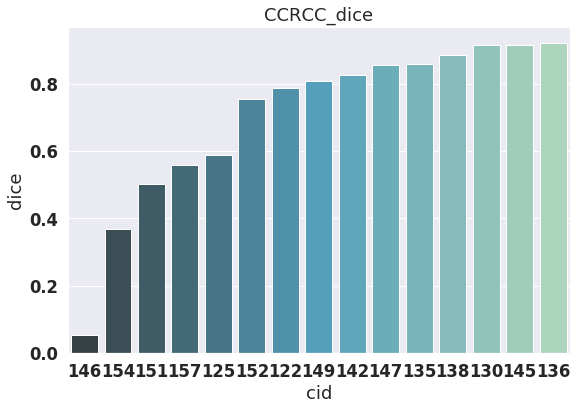

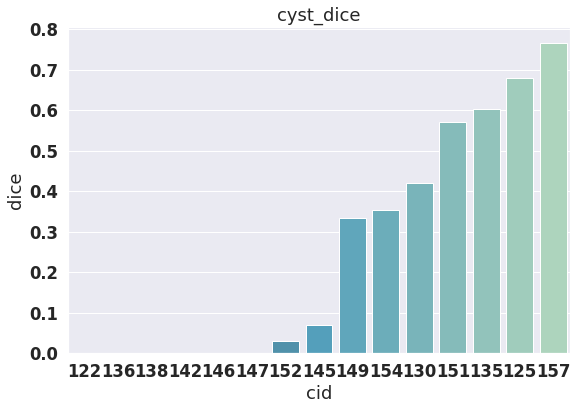

In [285]:

for leison in ['kidney','CCRCC','cyst']:
    plt.figure(figsize=(9,6))
    df2=df.loc[df['label_name']==leison,['dice','cid']].sort_values('dice').reset_index(drop=True)
    plt.rcParams["font.size"] = 22
    sns.barplot(x='cid',data=df2,y='dice',order=df2['cid'],palette='GnBu_d')
    plt.title(f'{leison}_dice')
    plt.show()



In [221]:
statistics_path='/home/kakeya/Desktop/higuchi/20191011/output/statistics.csv'
st_df=pd.read_csv(statistics_path,index_col=0)
st_df=st_df.reset_index()


In [222]:
st_df=st_df[st_df.isin({'index':[122, 125, 130, 135, 136, 138, 142, 145, 146, 147, 149, 151, 152,154, 157]})['index']]
st_df=st_df.rename(columns={'index':'cid'})

### scatter with size

In [245]:
count_cols=[col for col in st_df.columns if 'count' in col]
count_cols=[col for col in count_cols if 'SE3' in col]+['cid']
cou_df=st_df[count_cols].fillna(0)
cou_df.columns=['kid','ccrcc','cyst','cid']


In [308]:
df2=df.loc[df['label_name']=='CCRCC'][['cid','dice','recall','precision']]
df2['cid']=df2['cid'].astype(int)
cou_df2=cou_df.merge(df2,on='cid',how='inner')
cou_df2['log_ccrcc']=np.log10(cou_df2['ccrcc']+1)
cou_df2['log_cyst']=np.log10(cou_df2['cyst']+1)
cou_df2['log_kid']=np.log10(cou_df2['kid']+1)
cou_df2['dice']=np.round(cou_df2['dice'],3)

cou_df2.head()

,kid,ccrcc,cyst,cid,dice,recall,precision,log_ccrcc,log_cyst,log_kid
0,679953,7791.0,214.0,122,0.786,0.736619,0.842979,3.891649,2.332438,5.832480
1,391362,7179.0,9367.0,125,0.587,0.648558,0.536653,3.856124,3.971647,5.592580
2,481039,187320.0,2222.0,130,0.914,0.935698,0.892812,5.272586,3.346939,5.682181
3,353302,5262.0,6704.0,135,0.857,0.871912,0.842763,3.721233,3.826399,5.548147
4,1855627,1410687.0,175.0,136,0.922,0.979351,0.870383,6.149431,2.245513,6.268491


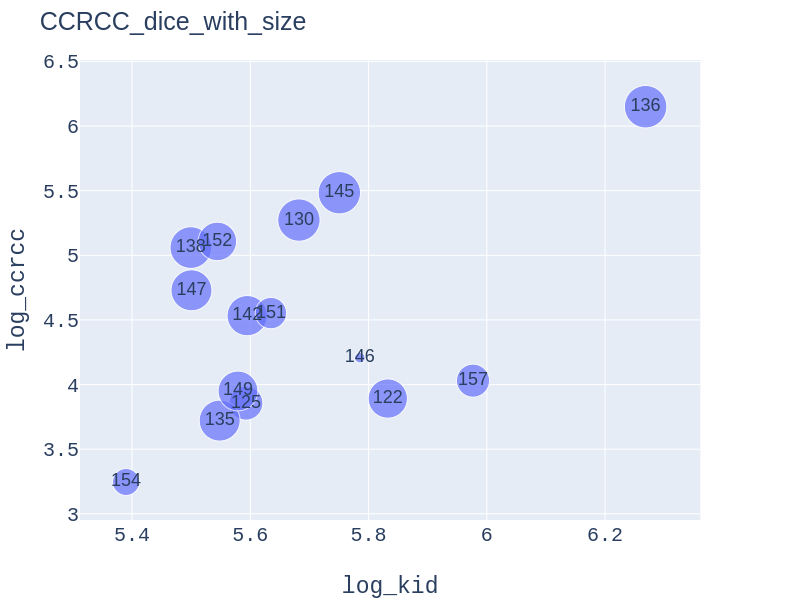

In [310]:
import plotly.express as px
fig = px.scatter(cou_df2, x="log_kid", y="log_ccrcc",text='cid', size='dice',size_max=30,hover_name='cid')
fig.update_layout(title_text="CCRCC_dice_with_size",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()

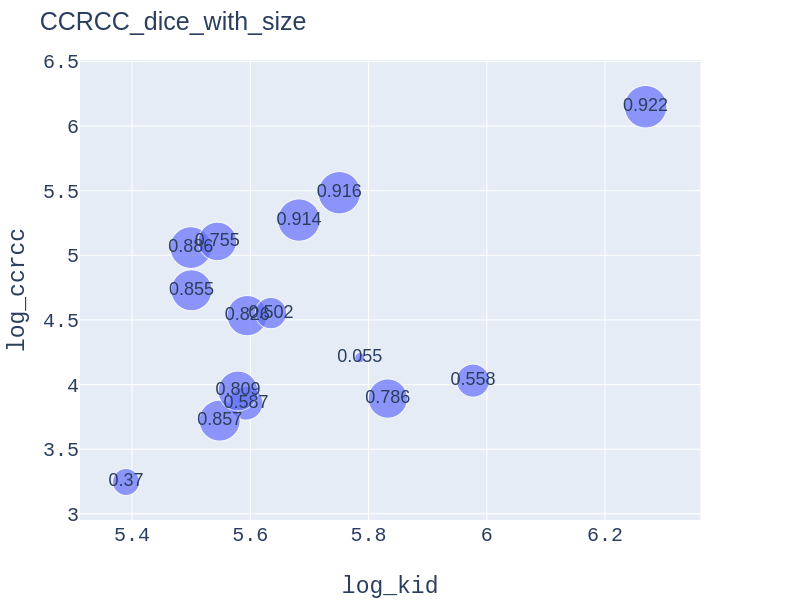

In [309]:
import plotly.express as px
fig = px.scatter(cou_df2, x="log_kid", y="log_ccrcc",text='dice', size='dice',size_max=30,hover_name='cid')
fig.update_layout(title_text="CCRCC_dice_with_size",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()

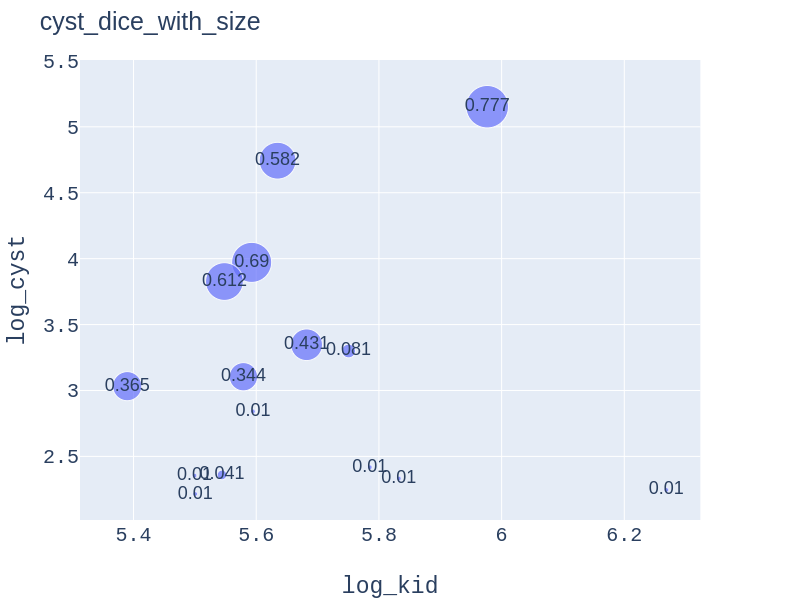

In [312]:
df2=df.loc[df['label_name']=='cyst'][['cid','dice','recall','precision']]
df2['cid']=df2['cid'].astype(int)
cou_df2=cou_df.merge(df2,on='cid',how='inner')
cou_df2['dice']=cou_df2['dice']+0.01
cou_df2['dice']=np.round(cou_df2['dice'],3)
cou_df2['log_ccrcc']=np.log10(cou_df2['ccrcc']+1)
cou_df2['log_cyst']=np.log10(cou_df2['cyst']+1)
cou_df2['log_kid']=np.log10(cou_df2['kid']+1)
cou_df2.head()

fig = px.scatter(cou_df2, x="log_kid", y="log_cyst", size='dice',text='dice',size_max=30)
fig.update_layout(title_text="cyst_dice_with_size",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()

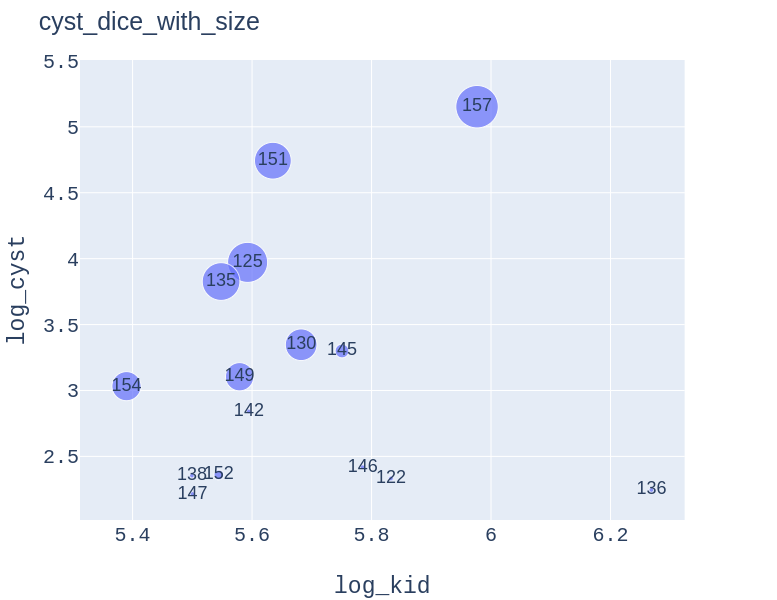

In [314]:
fig = px.scatter(cou_df2, x="log_kid", y="log_cyst", size='dice',text='cid',size_max=30)
fig.update_layout(title_text="cyst_dice_with_size",titlefont={"size": 25},font={'size':18})
fig.update_xaxes(title_font=dict(size=23, family='Courier'))
fig.update_yaxes(tickfont=dict(family='Courier', size=20))
fig.update_xaxes(tickfont=dict(family='Courier', size=20))
fig.update_yaxes(title_font=dict(size=23, family='Courier'))
fig.show()

In [249]:
import seaborn as sns
fig=plt.figure(figsize=(9,9))
# sns.set_palette('deep')

# plt.rcParams["font.size"] = 15
# plt.rcParams["font.weight"]
# sns.scatterplot(x='log_ccrcc',y='log_cyst',size='dice',data=cou_df2)
# plt.show()

<Figure size 648x648 with 0 Axes>

### corration with lumi

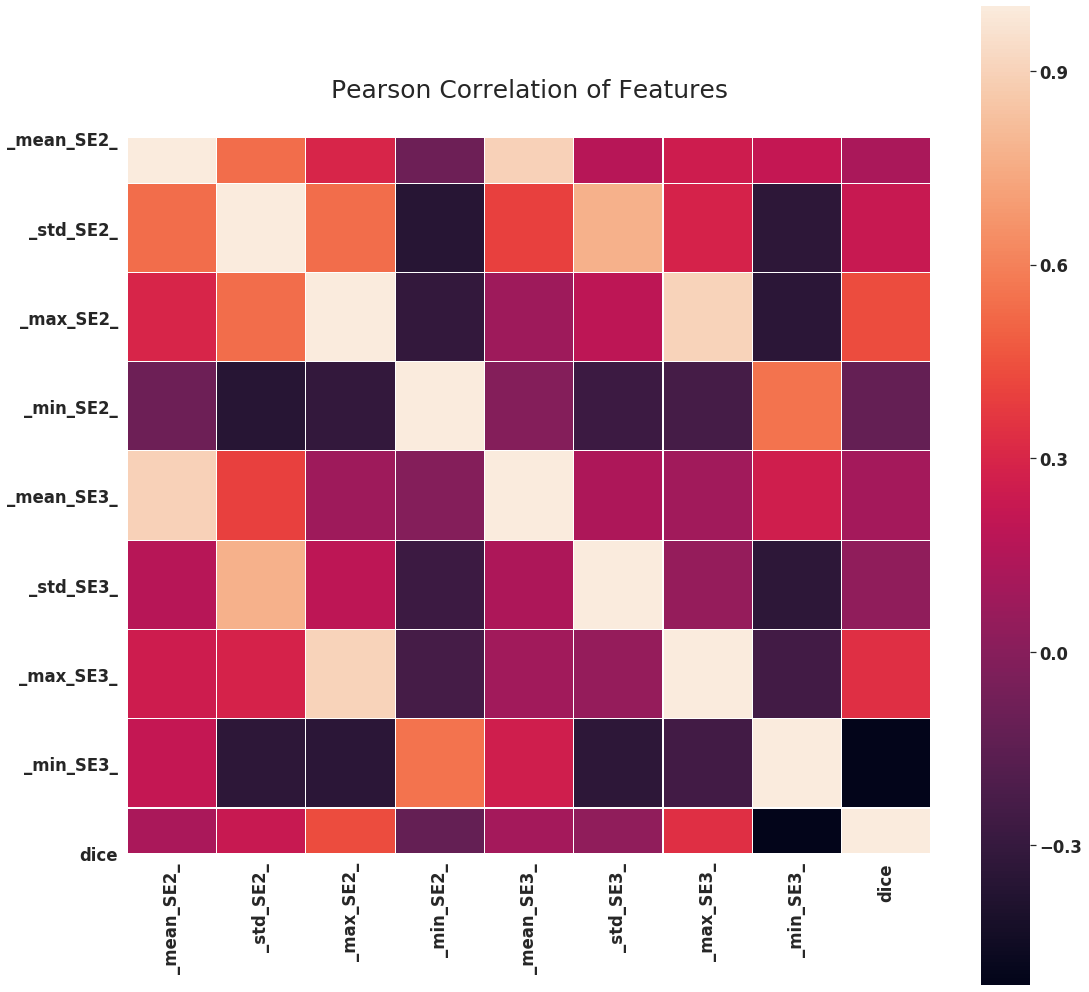

In [374]:
dice_df=df.loc[df['label_name']=='CCRCC',['cid','dice','recall','precision']]
lumi_cols=[col for col in st_df.columns if 'lumi_' in col]
lumi_cols=[col for col in lumi_cols if 'CCR' in col]+['cid']

lumi_df=st_df[lumi_cols].merge(dice_df,on='cid').drop(columns=['cid','recall','precision'])
lumi_df.columns=[col.strip('lumi|CCR') for col in lumi_df.columns]
colormap = plt.cm.RdBu
plt.figure(figsize=(18,18))
sns.set(font_scale=1.5)

plt.title('Pearson Correlation of Features', y=1.05, size=25)
sns.heatmap(lumi_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('Correlation_CCRCC.png')

plt.show()

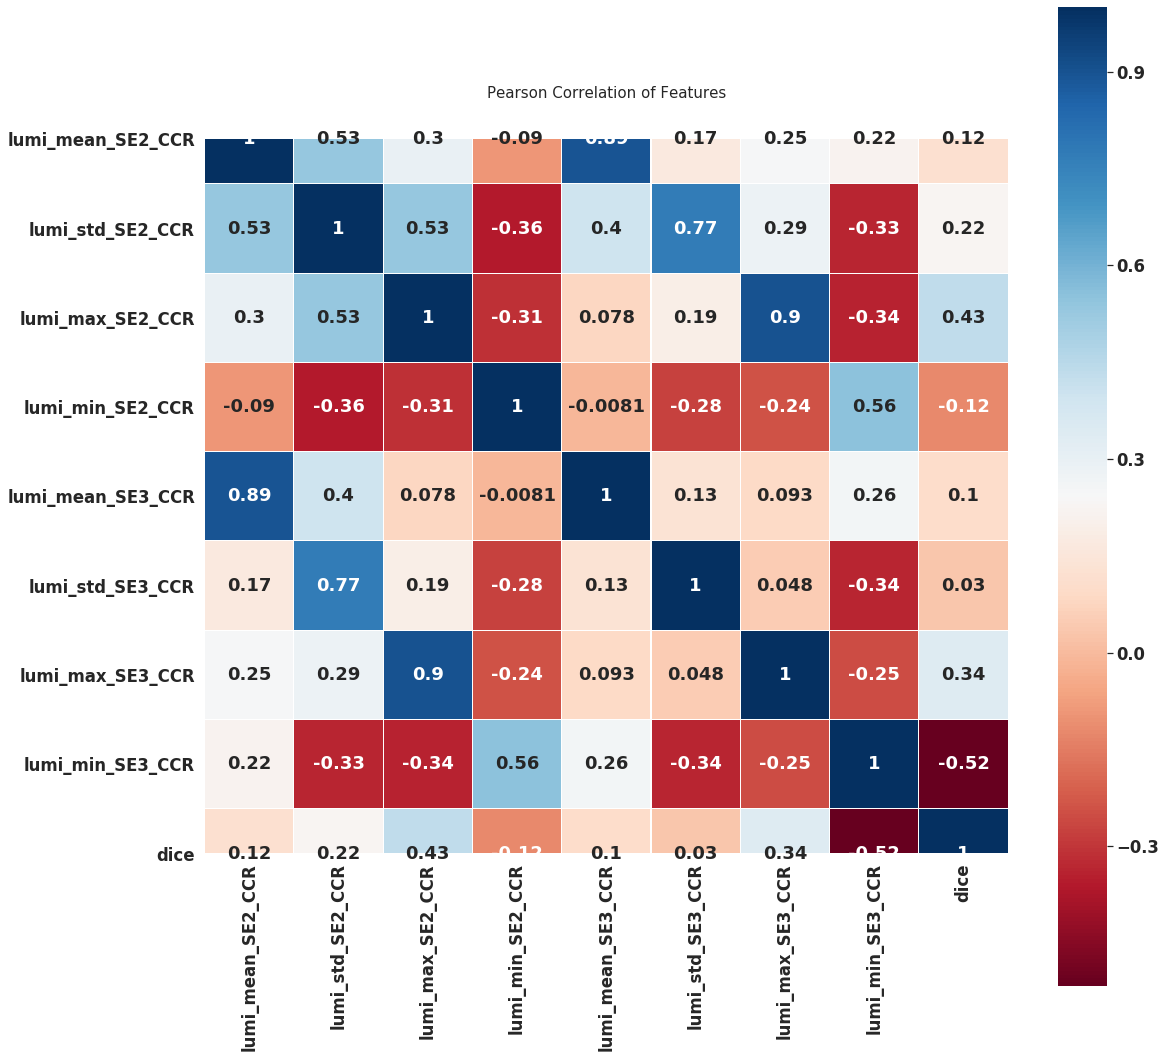

In [361]:
[col.strip('lumi|cys') for col in lumi_df.columns]


['_mean_SE2_',
 '_std_SE2_',
 '_max_SE2_',
 '_min_SE2_',
 '_mean_SE3_',
 '_std_SE3_',
 '_max_SE3_',
 '_min_SE3_',
 'dice']

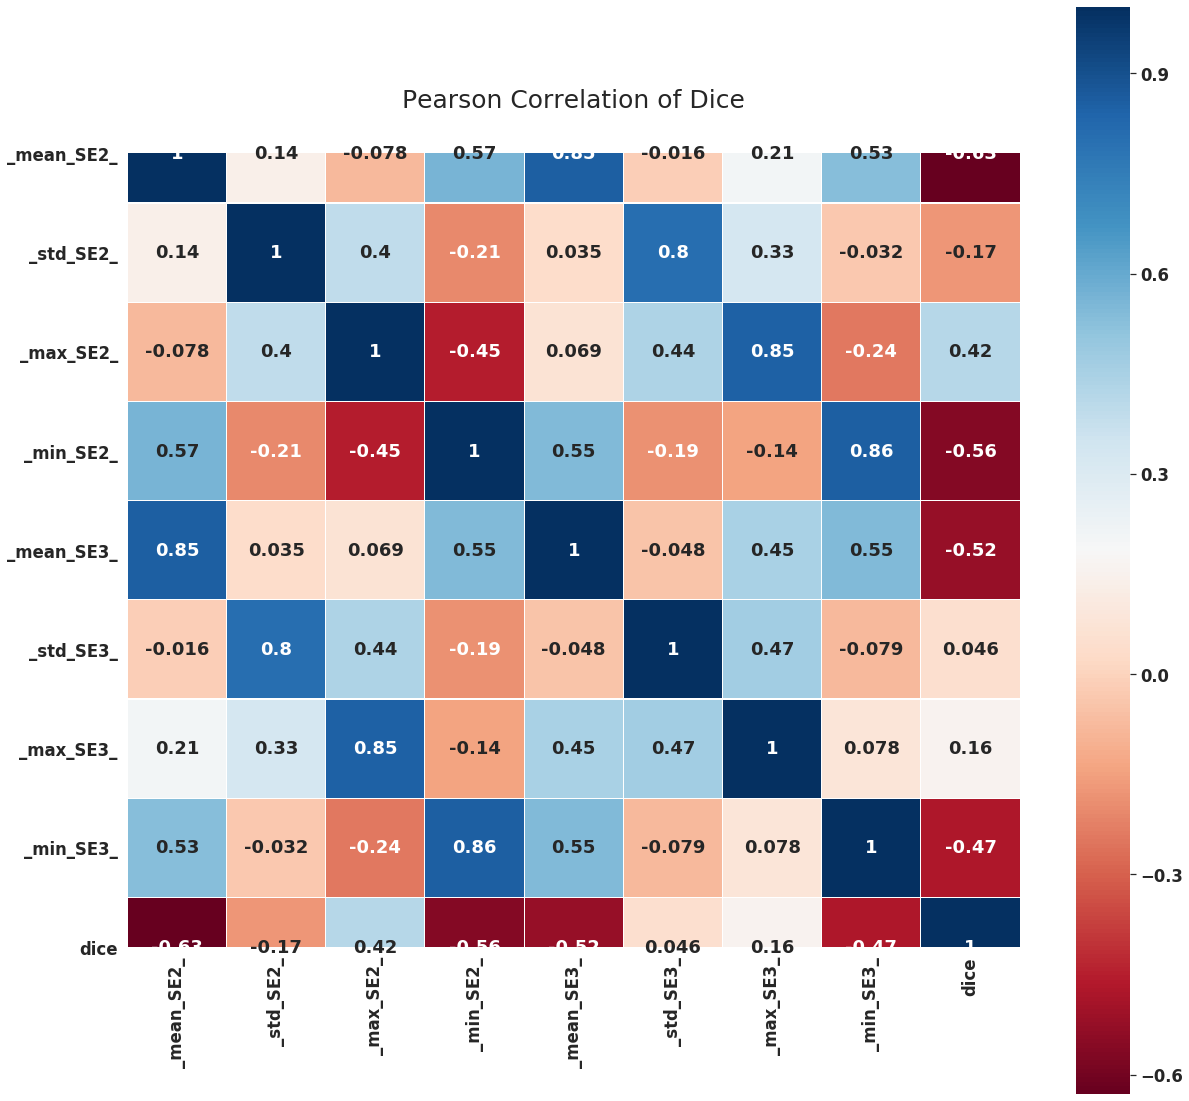

In [371]:
dice_df=df.loc[df['label_name']=='cyst',['cid','dice','recall','precision']]
lumi_cols=[col for col in st_df.columns if 'lumi_' in col]
lumi_cols=[col for col in lumi_cols if 'cys' in col]+['cid']
lumi_df=st_df[lumi_cols].merge(dice_df,on='cid').drop(columns=['cid','recall','precision'])
lumi_df.columns=[col.strip('lumi|cys') for col in lumi_df.columns]
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)

plt.title('Pearson Correlation of Dice', y=1.05, size=25)
sns.heatmap(lumi_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('Correlation_Cyst.png')
plt.show()